<a href="https://colab.research.google.com/github/troymessina/QuantumMechanics/blob/master/SphericalHarmonics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Spherical Harmonics

In [0]:
%matplotlib inline
from __future__ import division
import scipy as sci
import scipy.special as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
from matplotlib.colors import LinearSegmentedColormap

## SciPy Built-in Functions
SciPy has the spherical harmonics built into its special functions list as `sph_harm`. We can call them by $m$ and $l$ values. Let's take a look.

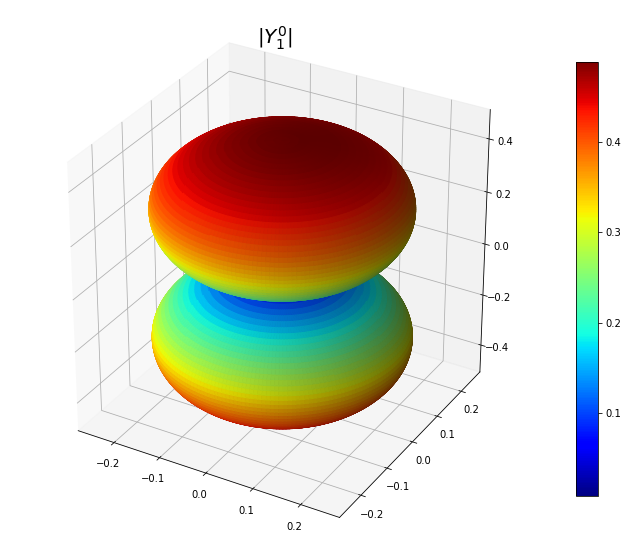

In [18]:
l = 1    #degree
m = 0    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] #arrays of angular variables
R = np.abs(sp.sph_harm(m, l, PHI, THETA)) #Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

N = R/R.max()    # Normalize R for the plot colors to cover the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(12,10))
im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N))
ax.set_title(r'$|Y^0_ 1|$', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)    # Assign the unnormalized data array to the mappable
                  #so that the scale corresponds to the values of R
fig.colorbar(m, shrink=0.8);

## Manual Programming
That feels like cheating. Let's plot them by creating our own function. We'll plot the probability distributions, and we'll ignore normalization constants for now.

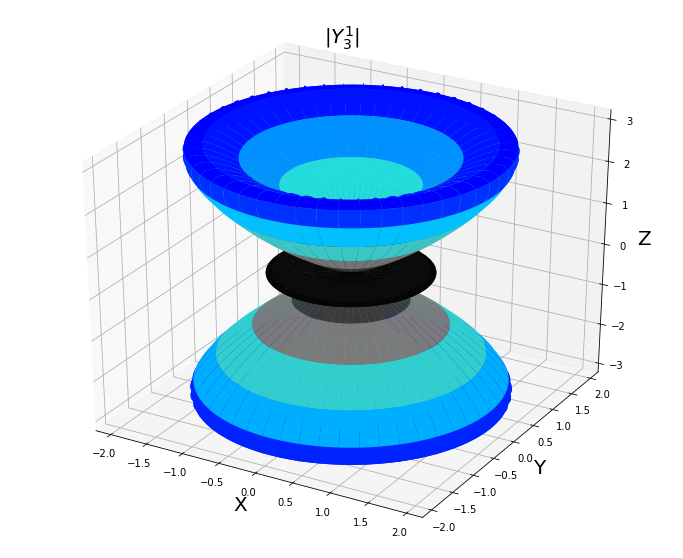

In [76]:
def f(theta,phi):
    return (np.sin(theta)*(5*np.cos(theta)**2-1))**2

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0,   np.pi, 500)[:, None]
phi   = np.linspace(0, 2*np.pi, 500)[None, :]

r = f(theta, phi)
x = r**2 * np.cos(phi) * np.sin(theta)
y = r**2 * np.sin(phi) * np.sin(theta)
z = r**2 * np.cos(theta)
#colors = ['red', 'orange', 'yellow', 'green', 'blue', 'green', 'yellow', 'orange', 'red']
colors = ['blue', 'cyan', 'gray','black', 'gray', 'cyan', 'blue']
cmap = LinearSegmentedColormap.from_list('name', colors)
norm = plt.Normalize(-3, 3)
ax.plot_surface(x,y,z, cmap=cmap, norm=norm)
#ax.plot_surface(x, y, z)
#ax.plot_wireframe(x,y,z, rstride=5, cstride=5)
ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("Z", fontsize=20)
ax.set_title(r'$|Y^1_ 3|$', fontsize=20)

plt.show()